### Bus passengers per head of poulation

Combining historic and modern datasets

All Data from https://www.gov.uk/government/statistical-data-sets/bus-statistics-data-tables#historical-data-downloads

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.style.use("seaborn-colorblind")
plt.style.use("seaborn-poster")

/tmp/ipykernel_55043/2409444768.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")
/tmp/ipykernel_55043/2409444768.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


In [2]:
df_old = pd.read_excel("../Data/bus01_hist.ods", sheet_name="BUS01b_hist", header=6)
df_old = df_old.pivot_table("Passenger Journeys, per head of population", ["Year"], "Region")
df_old

Region,East Midlands,East of England,England,England outside London,English metropolitan areas,English non-metropolitan areas,Great Britain,London,North East,North West,Scotland,South East,South West,Wales,West Midlands,Yorkshire and the Humber
Year,,,,,,,,,,,,,,,,
1991/92,60,30,83,68,133,44,83,168,135,91,112,34,41,46,94,100
1992/93,57,32,79,65,125,43,80,165,120,87,105,34,39,45,87,98
1993/94,56,30,77,63,121,42,78,163,112,81,103,33,40,46,88,94
1994/95,51,32,78,63,120,42,78,168,110,81,101,35,40,46,91,92
1995/96,53,31,80,64,123,43,80,173,110,87,99,36,42,45,89,92
1996/97,52,31,79,63,119,43,79,176,105,86,94,37,41,46,88,87
1997/98,52,32,79,62,118,42,78,183,104,81,88,36,42,42,90,85
1998/99,53,32,78,61,115,42,77,179,101,82,84,38,40,41,86,79
1999/00,52,33,78,60,111,42,77,181,100,76,90,38,39,40,87,80


In [3]:
df_new = pd.read_excel("../Data/bus01.ods", sheet_name="BUS01b", header=7, index_col="Year")
df_new.head()

,North East,North West,Yorkshire and the Humber,East Midlands,West Midlands,East of England,London,South East,South West,English metropolitan areas,English non-metropolitan areas,England,Scotland,Wales,Great Britain,England outside London,Revised
Year,,,,,,,,,,,,,,,,,
2004/05,81.095731,64.267814,69.137007,46.694768,76.128267,30.363731,242.496499,34.809362,33.823143,95.253736,37.036855,80.213486,90.330660,41.575054,79.134582,52.005977,[z]
2005/06,79.312803,64.406099,69.773764,46.559600,74.881995,30.164688,250.177916,35.201974,33.597433,94.802260,36.969728,81.293203,91.071019,40.446294,80.077904,51.821554,[z]
2006/07,80.826271,64.964175,70.284490,46.191096,75.092393,32.691974,262.359557,37.448280,36.650695,94.586695,38.852860,84.330037,92.706590,39.785287,82.806812,53.139827,[z]
2007/08,79.602519,67.483699,71.196648,48.719349,75.488179,33.455035,280.805813,38.237377,37.907360,95.524600,40.061740,88.169186,94.249880,41.675081,86.350134,54.245510,[z]
2008/09,81.408623,67.158995,72.185886,48.537499,75.374905,33.945575,285.222152,38.918967,39.371153,95.515816,40.724859,89.479444,92.953468,42.906419,87.433486,54.728416,"[r] Yorkshire and the Humber, England, Great B..."


In [4]:
df = pd.concat([df_old, df_new])
# Remove duplicate years from index
df = df[~df.index.duplicated(keep="last")]

<AxesSubplot: xlabel='Year', ylabel='Passenger journeys per head of population'>

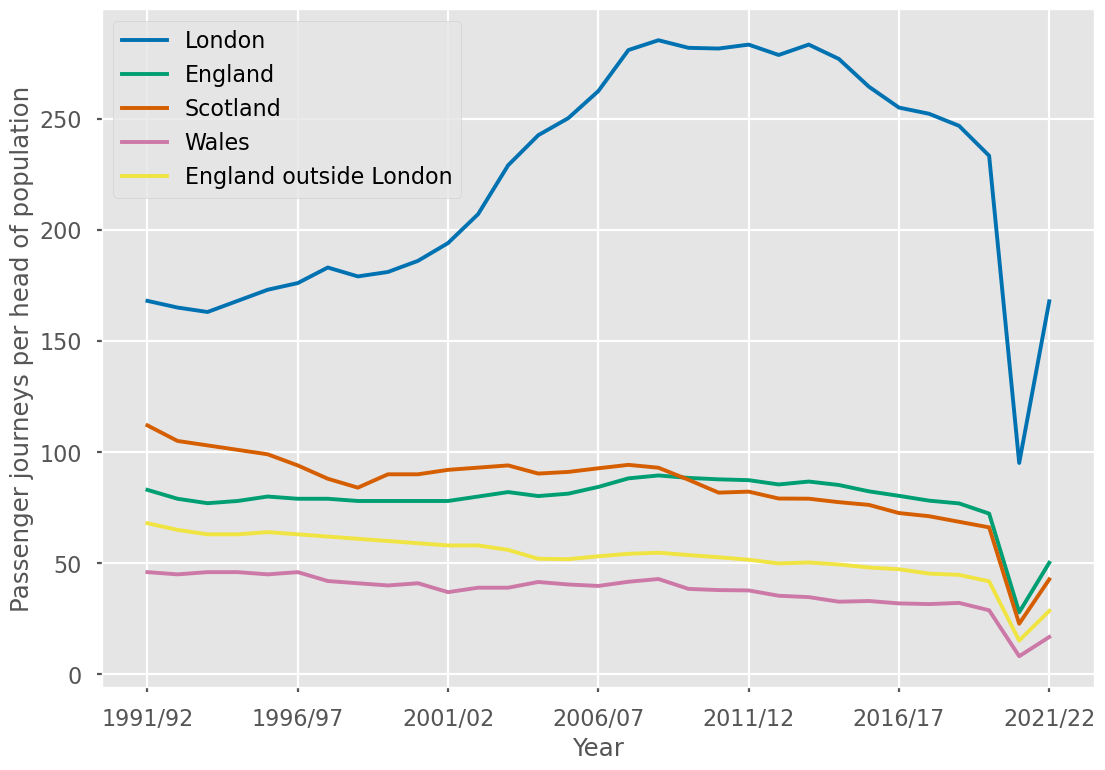

In [9]:
df[["London", "England", "Scotland", "Wales", "England outside London"]].plot(ylabel="Passenger journeys per head of population") 